#**Tugas Besar 1 Mata Kuliah Pembelajaran Mesin**
#**Clustering**
---




###Dika Fajar Ramadan 
###1301190260 
###IF-43-10

#Import Library dan Dataset

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from google.colab import files

In [2]:
!gdown --id 1eny4r8S2gCtyk2EVyZk0ept56aF4y6DC

Downloading...
From: https://drive.google.com/uc?id=1eny4r8S2gCtyk2EVyZk0ept56aF4y6DC
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 134MB/s]


In [3]:
#Read data
df_DataTrain = pd.read_csv('kendaraan_train.csv')


In [4]:
#Menampilkan 5 data teratas 
df_DataTrain.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


#Eksploarsi Data 


In [6]:
#Menampilkan bentuk matrix DataTrain 
df_DataTrain.shape

(285831, 12)

In [7]:
#Menampilkan informasi DataTrain
df_DataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [8]:
#Menampilkan sebaran data 
df_DataTrain.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


#Data Preprocessing 

In [9]:
#Menghapus varible yang tidak digunakan
df=df_DataTrain.drop(['id','Tertarik'],axis=1)

In [10]:
#Menampilkan informasi 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
dtypes: float64(7), object(3)
memory usage: 21.8+ MB


In [11]:
#Menampilkan data sebelum diubah
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0


In [12]:
#Cek Jumlah Missing Value
df.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [13]:
#mengisi missing value menggunakan mode (Data yang sering muncul) dan mean (rata-rata) 
df['Jenis_Kelamin']=df['Jenis_Kelamin'].fillna(df['Jenis_Kelamin'].mode().iloc[0])
df['Umur_Kendaraan']=df['Umur_Kendaraan'].fillna(df['Umur_Kendaraan'].mode().iloc[0])
df['Kendaraan_Rusak']=df['Kendaraan_Rusak'].fillna(df['Kendaraan_Rusak'].mode().iloc[0])
df.fillna(df.mean().round(), inplace=True)
df.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [14]:
#Menampilkan data yang sudah berhasil diubah
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Pernah,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0


In [15]:
#Mengubah data kategorik menjadi numerik menggunakan LabelEncoder
for col in df.columns:
  if df[col].dtypes == 'object':
    end = LabelEncoder()
    df[col]=end.fit_transform(df[col])
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0
1,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0
2,0,21.0,1.0,46.0,1.0,1,1,32733.0,160.0,119.0
3,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0
4,0,50.0,1.0,35.0,0.0,2,0,34857.0,88.0,194.0


In [16]:
#Menampilkan informasi dataset yang sudah dihandle missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285831 non-null  int64  
 1   Umur               285831 non-null  float64
 2   SIM                285831 non-null  float64
 3   Kode_Daerah        285831 non-null  float64
 4   Sudah_Asuransi     285831 non-null  float64
 5   Umur_Kendaraan     285831 non-null  int64  
 6   Kendaraan_Rusak    285831 non-null  int64  
 7   Premi              285831 non-null  float64
 8   Kanal_Penjualan    285831 non-null  float64
 9   Lama_Berlangganan  285831 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 21.8 MB


In [17]:
#Mengubah data type setiap kolom int menjadi float
for col in df.columns:
  if df[col].dtypes == 'int':
    df[col] = df[col].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285831 non-null  float64
 1   Umur               285831 non-null  float64
 2   SIM                285831 non-null  float64
 3   Kode_Daerah        285831 non-null  float64
 4   Sudah_Asuransi     285831 non-null  float64
 5   Umur_Kendaraan     285831 non-null  float64
 6   Kendaraan_Rusak    285831 non-null  float64
 7   Premi              285831 non-null  float64
 8   Kanal_Penjualan    285831 non-null  float64
 9   Lama_Berlangganan  285831 non-null  float64
dtypes: float64(10)
memory usage: 21.8 MB


In [18]:
#Menampilkan data yang sudah berhasil diubah menjadi tipe float
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.0,30.0,1.0,33.0,1.0,1.0,1.0,28029.0,152.0,97.0
1,0.0,48.0,1.0,39.0,0.0,2.0,0.0,25800.0,29.0,158.0
2,0.0,21.0,1.0,46.0,1.0,1.0,1.0,32733.0,160.0,119.0
3,1.0,58.0,1.0,48.0,0.0,0.0,1.0,2630.0,124.0,63.0
4,0.0,50.0,1.0,35.0,0.0,2.0,0.0,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,1.0,23.0,1.0,4.0,1.0,1.0,1.0,25988.0,152.0,217.0
285827,1.0,21.0,1.0,46.0,1.0,1.0,1.0,44686.0,152.0,50.0
285828,1.0,23.0,1.0,50.0,1.0,1.0,1.0,49751.0,152.0,226.0
285829,0.0,68.0,1.0,7.0,1.0,0.0,1.0,30503.0,124.0,270.0


In [19]:
#Cek jumlah duplicate pada dataset
df.duplicated().sum()

331

In [20]:
#Menghapus data duplicate 
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#Check Outlier

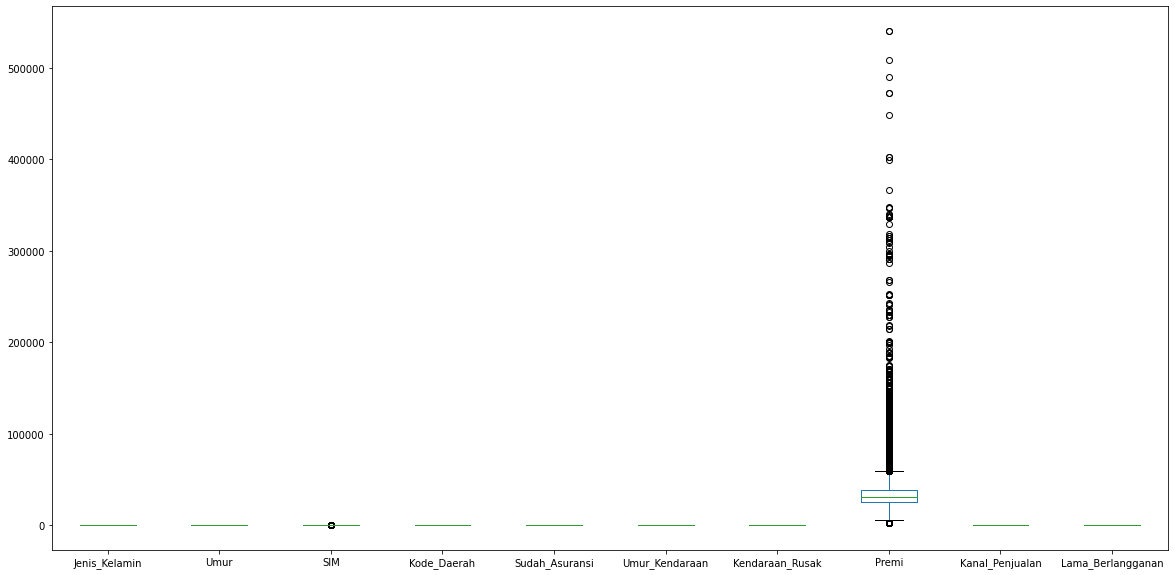

In [21]:
#plot setiap kolom pada dataset menggunakan boxplot untuk mengetahui outlier
df.plot(kind = 'box', figsize=(20,10))
plt.show()

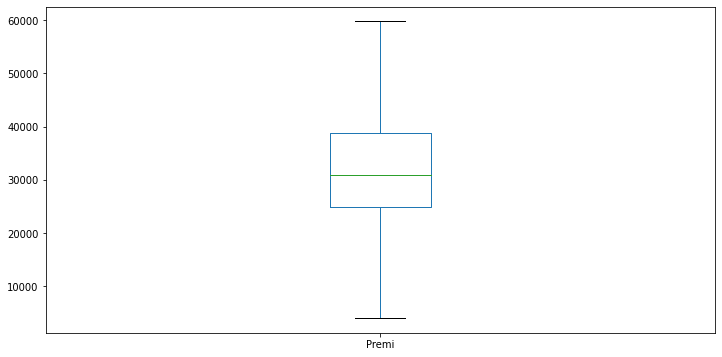

In [22]:
#handling Outlier Pada Kolom Premi
q1 = df['Premi'].quantile(0.25)
q3 = df['Premi'].quantile(0.75)
iqr = q3 - q1

lower = q1 - (iqr * 1.5)
upper = q3 + (iqr * 1.5)

df['Premi'] = df['Premi'].apply(lambda x: upper if x > upper else lower if x < lower else x)
df['Premi'].plot(kind='box', figsize=(12,6) )

In [23]:
# Export data  
df.to_csv('kendaraan_preprocessed.csv', index=False)
files.download('kendaraan_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#correlation

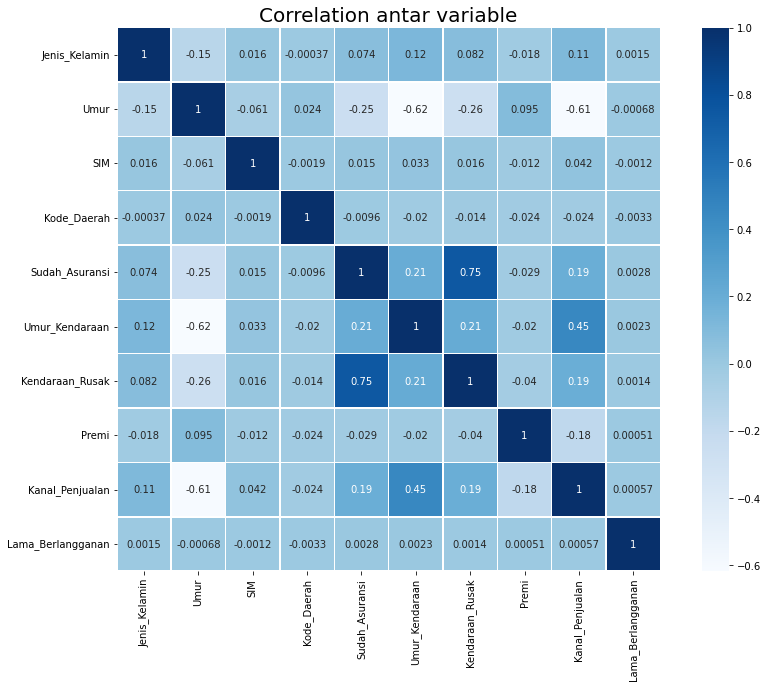

In [24]:
# Menampilkan korelasi antar variable
plt.figure(figsize=(15,10))
plt.title('Correlation antar variable', y=1, size=20)
sns.heatmap(df.corr(method='spearman'), annot=True, linewidths=.5, square=True, cmap=plt.cm.Blues)
plt.show()

In [25]:
#Menampilkan nilai korelasi antar variable 
df.corr()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
Jenis_Kelamin,1.000000,-0.135889,0.015918,-0.001465,0.074294,0.105322,0.082449,-0.005075,0.106421,0.001359
Umur,-0.135889,1.000000,-0.075221,0.041366,-0.236980,-0.486555,-0.249102,0.063848,-0.548712,0.000114
SIM,0.015918,-0.075221,1.000000,-0.003153,0.015260,0.029632,0.016445,-0.011285,0.041156,-0.001204
Kode_Daerah,-0.001465,0.041366,-0.003153,1.000000,-0.022582,-0.025896,-0.026366,-0.010616,-0.040940,-0.003354
Sudah_Asuransi,0.074294,-0.236980,0.015260,-0.022582,1.000000,0.157753,0.749588,0.004808,0.205884,0.002774
Umur_Kendaraan,0.105322,-0.486555,0.029632,-0.025896,0.157753,1.000000,0.158162,0.023506,0.363096,0.002003
Kendaraan_Rusak,0.082449,-0.249102,0.016445,-0.026366,0.749588,0.158162,1.000000,-0.008849,0.209951,0.001318
Premi,-0.005075,0.063848,-0.011285,-0.010616,0.004808,0.023506,-0.008849,1.000000,-0.113323,-0.000112
Kanal_Penjualan,0.106421,-0.548712,0.041156,-0.040940,0.205884,0.363096,0.209951,-0.113323,1.000000,0.000328
Lama_Berlangganan,0.001359,0.000114,-0.001204,-0.003354,0.002774,0.002003,0.001318,-0.000112,0.000328,1.000000


In [26]:
#menampilkan nilai korelasi yang tinggi 
def highCorr(data, Corrmin):
  colHighCorr = set()
  for i in range (len(data.corr().columns)):
        for j in range (i) :
            if (data.corr().iloc[i, j]) > Corrmin:
                col = data.corr().columns[i]
                colHighCorr.add(col)
  return colHighCorr


In [27]:
#Menampilkan kolom dengan value high corelation 
colHighCorr = highCorr(df, 0.005)
colHighCorr

{'Kanal_Penjualan',
 'Kendaraan_Rusak',
 'Kode_Daerah',
 'Premi',
 'SIM',
 'Sudah_Asuransi',
 'Umur_Kendaraan'}

In [28]:
#Menampilkan 5 data teratas
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.0,30.0,1.0,33.0,1.0,1.0,1.0,28029.0,152.0,97.0
1,0.0,48.0,1.0,39.0,0.0,2.0,0.0,25800.0,29.0,158.0
2,0.0,21.0,1.0,46.0,1.0,1.0,1.0,32733.0,160.0,119.0
3,1.0,58.0,1.0,48.0,0.0,0.0,1.0,4082.0,124.0,63.0
4,0.0,50.0,1.0,35.0,0.0,2.0,0.0,34857.0,88.0,194.0


In [29]:
# Drop atribut yang mengandung data 0 atau 1
df.drop(columns=df.columns[((df == 1).mean() > 0.1)], axis=1, inplace=True)
df

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,28029.0,152.0,97.0
1,48.0,39.0,25800.0,29.0,158.0
2,21.0,46.0,32733.0,160.0,119.0
3,58.0,48.0,4082.0,124.0,63.0
4,50.0,35.0,34857.0,88.0,194.0
...,...,...,...,...,...
285826,23.0,4.0,25988.0,152.0,217.0
285827,21.0,46.0,44686.0,152.0,50.0
285828,23.0,50.0,49751.0,152.0,226.0
285829,68.0,7.0,30503.0,124.0,270.0


#K-Means Clustering 

In [30]:
#Menghitung jarak antar centroid menggunakan Euclidean distance
def euclidean(a1, a2):
  return np.sqrt(np.sum((a1-a2)**2))

In [31]:
#K-Means Clustering from scratch
class k_means:
  # Inisialisasi pembentukan attribute atau variable 
  def __init__(self, k=3, iteration=100):
    self.k=k
    self.iteration=iteration
    self.centroids = []
    self.clusters = [[] for i in range(self.k)]
  
  #Pembentukan array dari data yang dimasukkan
  def value(self, X):
    self.df = X
    self.row, self.column = X.shape

    #Pembentukan centroid dengan cara random
    centroid_index = np.random.choice(self.row, self.k, replace=False)
    for i in centroid_index:
      self.centroids.append(self.df[i])

    #Melakukan looping sebanyak iterasi yang diinputkan
    #Menentukan cluster atau centroid terdekat
    for i in range(self.iteration):
      clusters = [[] for i in range(self.k)]

      #Melakukan looping sebanyak data inputan
      #Mencari centroid terdekat
      for idx, row in enumerate(self.df):
        closer_centroid = self.select_closerCentroid(row)
        clusters[closer_centroid].append(idx)

      self.clusters = clusters

      # Update centroid setelah mendapatkan closer centroid
      oldCentroid = self.centroids
      self.centroids = self.setNewCentroid()

      # Melakukan Checking apakah centroid berubah
      # Menghitung jarak antara centroid baru dengan centroid yang lama
      change = False
      for i, oldCentroid in enumerate(oldCentroid):
        dist = euclidean(oldCentroid, self.centroids[i])
        if ( dist != 0):
          change = True
      if ( change == False):
        break

    # Pembuatan label cluster  
    labels = self.setLables()
    return labels

  # Memilih Centroid terdekat
  def select_closerCentroid(self, row):
    allDist = [euclidean(row, centroid) for centroid in self.centroids]
    return np.argmin(allDist)

  # Menggenerate atau membuat centroid baru
  def setNewCentroid(self):
    centroids = np.zeros((self.k, self.column))
    for cluster_idx, cluster in enumerate(self.clusters):
      new_centroid = np.mean(self.df[cluster], axis=0)
      centroids[cluster_idx] = new_centroid
    return centroids

  #generate labels
  def setLables(self):
    labels = np.empty(self.row)
    for cluster_idx, cluster in enumerate(self.clusters):
      for row in cluster:
        labels[row] = cluster_idx
    return labels


#Scalling

In [32]:
#Scalling data menjadi 0 sampai 1 menggunakan metode MinMaxScaller()
scalling = MinMaxScaler()
df = pd.DataFrame(scalling.fit_transform(df))
df.columns = ['Umur', 'Kode_Daerah', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan']
df

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,0.634615,0.430392,0.932099,0.301038
1,0.430769,0.750000,0.390331,0.172840,0.512111
2,0.015385,0.884615,0.514935,0.981481,0.377163
3,0.584615,0.923077,0.000000,0.759259,0.183391
4,0.461538,0.673077,0.553109,0.537037,0.636678
...,...,...,...,...,...
285495,0.046154,0.076923,0.393710,0.932099,0.716263
285496,0.015385,0.884615,0.729763,0.932099,0.138408
285497,0.046154,0.961538,0.820794,0.932099,0.747405
285498,0.738462,0.134615,0.474856,0.759259,0.899654


In [33]:
"""Setelah menghapus data yang mengandung 0,1 dan yang memiliki korelasi tinggi
   yaitu hanya tinggal kolom Umur, Kode_Daerah, Premi, dan Kanal_Penjualan, dan Lama_Berlangganan.
   maka akan diambil dua dari lima kolom tersebut, disini saya mengambil kolom Premi dan 
   Kanal_Penjualan"""

df_select = df[['Umur', 'Premi']]
df_select

,Umur,Premi
0,0.153846,0.430392
1,0.430769,0.390331
2,0.015385,0.514935
3,0.584615,0.000000
4,0.461538,0.553109
...,...,...
285495,0.046154,0.393710
285496,0.015385,0.729763
285497,0.046154,0.820794
285498,0.738462,0.474856


Text(0, 0.5, 'Premi')

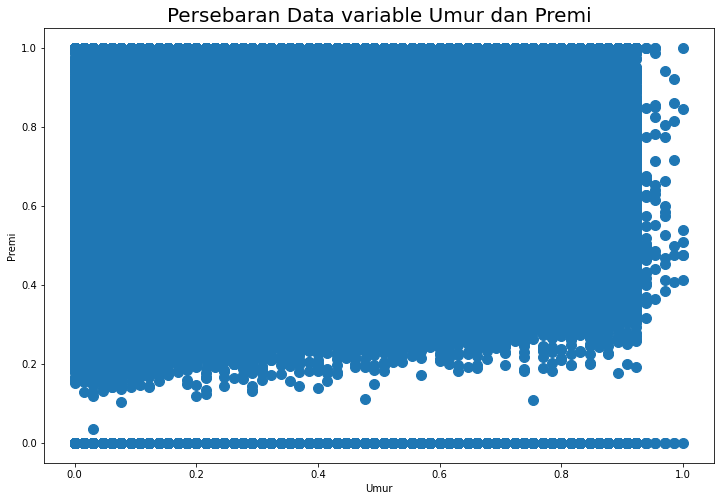

In [34]:
#Plot sebaran data dari variable Umur dan Premi
plt.figure(figsize=(12,8))
plt.scatter(df_select['Umur'], df_select['Premi'], s=100)
plt.title("Persebaran Data variable Umur dan Premi", size = 20)
plt.xlabel("Umur")
plt.ylabel("Premi")

In [35]:
# Implementasi K-Means Clustering pada data Premi & Kanal Penjualan
kMeans = k_means(k=4, iteration=10)
cluster = kMeans.value(df_select.values)
centroid = kMeans.centroids

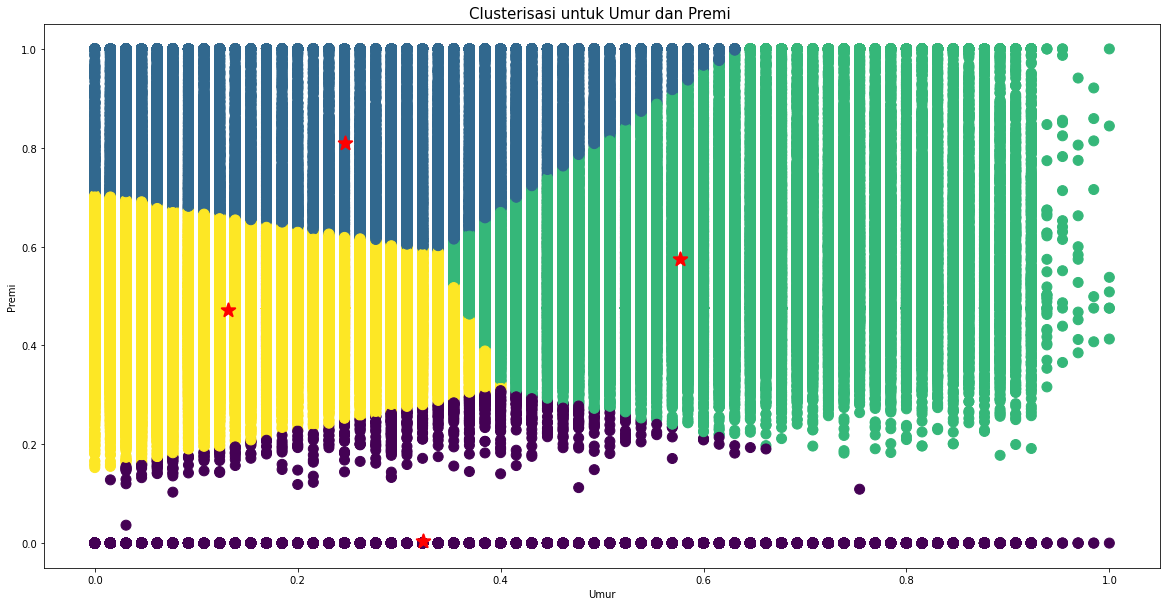

In [36]:
#Plot clustering
plt.figure(figsize=(20,10))
plt.scatter(df_select['Umur'], df_select['Premi'], c=cluster, s=100) 
plt.scatter(centroid[:,0], centroid[:, 1], c='red', marker='*', linewidths=2, s=200)
plt.xlabel('Umur')
plt.ylabel('Premi')
plt.title('Clusterisasi untuk Umur dan Premi ',y=1,size=15)
plt.show()

#Evaluation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


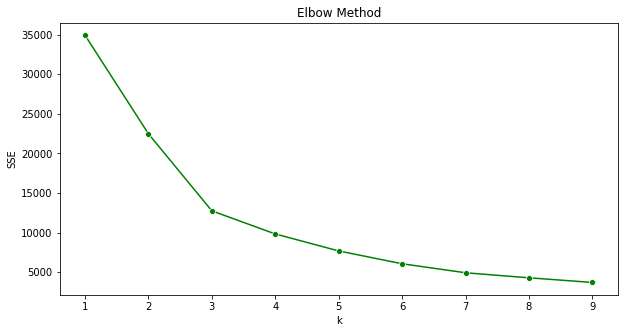

In [41]:
# Evaluasi menggunakan sum of squared errors
sse = []
K = list(range(1,10))
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_select)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
sns.lineplot(K, sse, marker='o', color='green')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

#Experiment

In [38]:
df_select1 = df[['Umur', 'Kode_Daerah']]
df_select1 

,Umur,Kode_Daerah
0,0.153846,0.634615
1,0.430769,0.750000
2,0.015385,0.884615
3,0.584615,0.923077
4,0.461538,0.673077
...,...,...
285495,0.046154,0.076923
285496,0.015385,0.884615
285497,0.046154,0.961538
285498,0.738462,0.134615


Text(0, 0.5, 'Kode_Daerah')

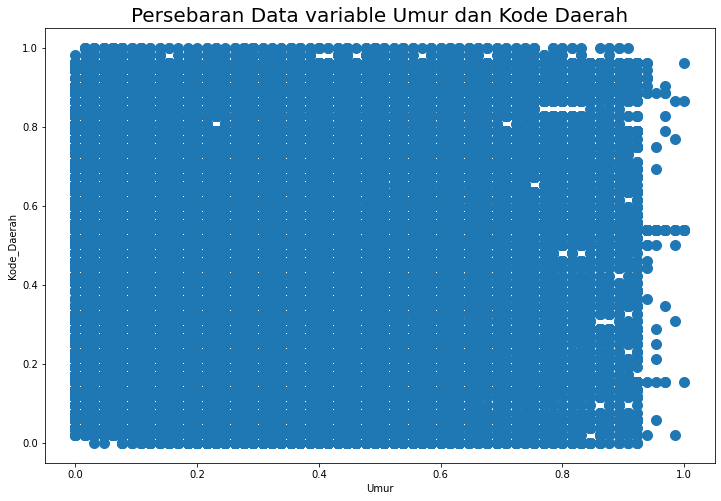

In [39]:
#Plot sebaran data dari variable Umur dan Kode_Daerah
plt.figure(figsize=(12,8))
plt.scatter(df_select1['Umur'], df_select1['Kode_Daerah'], s=100)
plt.title("Persebaran Data variable Umur dan Kode Daerah", size = 20)
plt.xlabel("Umur")
plt.ylabel("Kode_Daerah")

In [42]:
# Implementasi K-Means Clustering pada Umur & Kode_Daerah
kMeans = k_means(k=3, iteration=10)
cluster = kMeans.value(df_select1.values)
centroid = kMeans.centroids

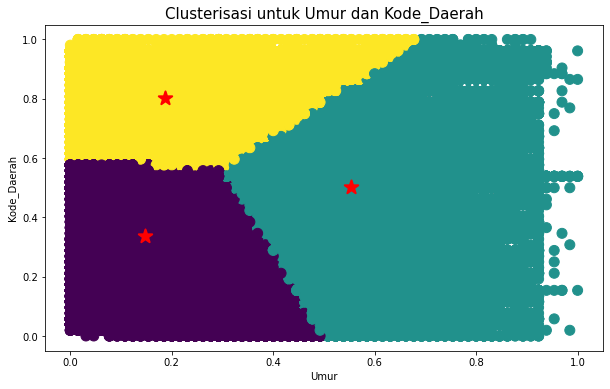

In [43]:
#Plot clusterisasi untuk kolom umur dan Kode_Daerah
plt.figure(figsize=(10,6))
plt.scatter(df_select1['Umur'], df_select1['Kode_Daerah'], c=cluster, s=100)
plt.scatter(centroid[:,0], centroid[:, 1], c='red', marker='*', linewidths=2, s=200)
plt.xlabel('Umur')
plt.ylabel('Kode_Daerah')
plt.title('Clusterisasi untuk Umur dan Kode_Daerah',y=1,size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


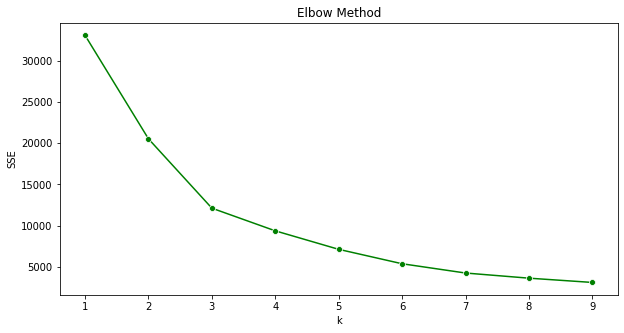

In [44]:
# Evaluasi menggunakan sum of squared errors
sse = []
K = list(range(1,10))
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_select1)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
sns.lineplot(K, sse, marker='o', color='green')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [52]:
#Select kolom untuk ekperimen data ke 2
df_select2 = df[['Premi', 'Kanal_Penjualan']]
df_select2

,Premi,Kanal_Penjualan
0,0.430392,0.932099
1,0.390331,0.172840
2,0.514935,0.981481
3,0.000000,0.759259
4,0.553109,0.537037
...,...,...
285495,0.393710,0.932099
285496,0.729763,0.932099
285497,0.820794,0.932099
285498,0.474856,0.759259


Text(0, 0.5, 'Kanal_Penjualan')

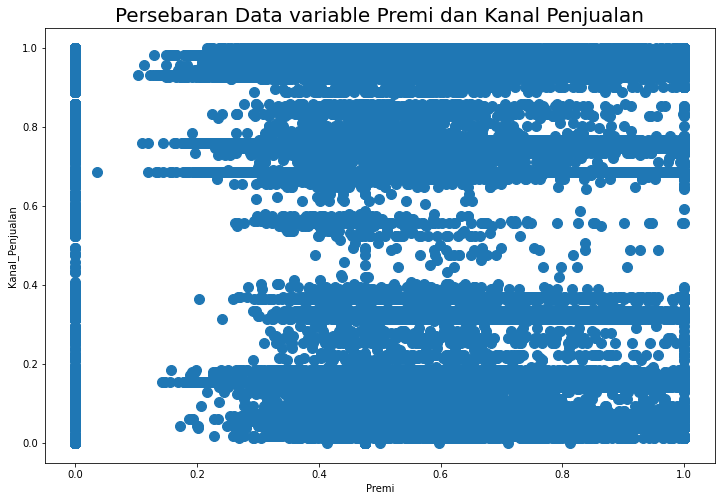

In [53]:
#Plot sebaran data dari variable Premi dan Kanal_Penjualan
plt.figure(figsize=(12,8))
plt.scatter(df_select2['Premi'], df_select2['Kanal_Penjualan'], s=100)
plt.title("Persebaran Data variable Premi dan Kanal Penjualan", size = 20)
plt.xlabel("Premi")
plt.ylabel("Kanal_Penjualan")

In [54]:
#Implementasi K-Means Clustering pada data Premi & Kanal Penjualan
kMeans = k_means(k=3, iteration=10)
cluster = kMeans.value(df_select2.values)
centroid = kMeans.centroids

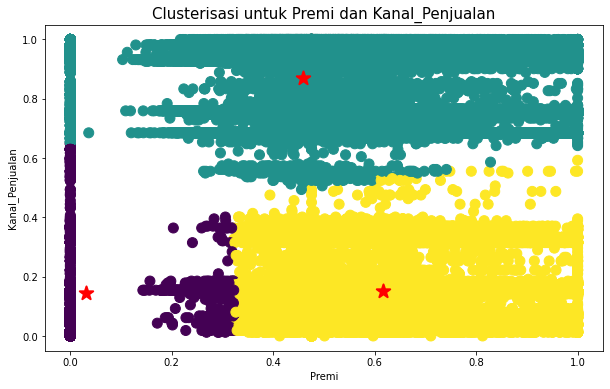

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(df_select2['Premi'], df_select2['Kanal_Penjualan'], c=cluster, s=100)
plt.scatter(centroid[:,0], centroid[:, 1], c='red', marker='*', linewidths=2, s=200)
plt.xlabel('Premi')
plt.ylabel('Kanal_Penjualan')
plt.title('Clusterisasi untuk Premi dan Kanal_Penjualan',y=1,size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


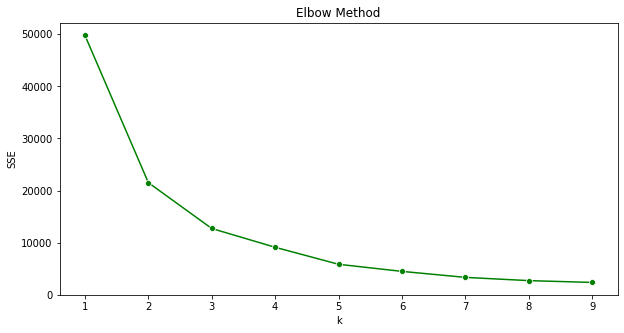

In [56]:
# Evaluasi menggunakan sum of squared errors
sse = []
K = list(range(1,10))
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_select2)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
sns.lineplot(K, sse, marker='o', color='green')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

#Kesimpulan 
Berdasarkan data yang sudah diolah dan diuji, dapat disimpulkan bahwa proses clustering akan lebih optimal jika menggunakan k=3. Hal ini dapat dilihat dari grafik Elbow Method bahwa dengan k=3 data akan lebih mudah dipahami dan SSE nya pun tidak semakin kecil. selain itu data juga dapat lebih optimal jika menggunakan kolom dengan nilai korelasi yang tinggi hal ini dapat dilihat dari plot Clusterisasi bahwa ketika menggunakan kolom korelasi yang tinggi sebaran data pun lebih rapat dan lebih dekat sehingga lebih rapi dan mudah dipahami ketika sudah di clustering. 